In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


this dataset contains details of customers in which both numerical and categorical data present. here churn is the target variable which contains 2 categories so it will be termed as classification problem where we need to predict the several churn using classification models

In [4]:
df.shape

(7043, 21)

this dataset contains 7043 rows and 21 columns.out of this 1 is target variable and remaining 20 are independent variables

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there are 3 different types of data present in dataset -object,int,float

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

in this data null vlues are not present

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


it shows brief about dataset which includes indexing type,column type, no null vales,memory usage.

<Axes: >

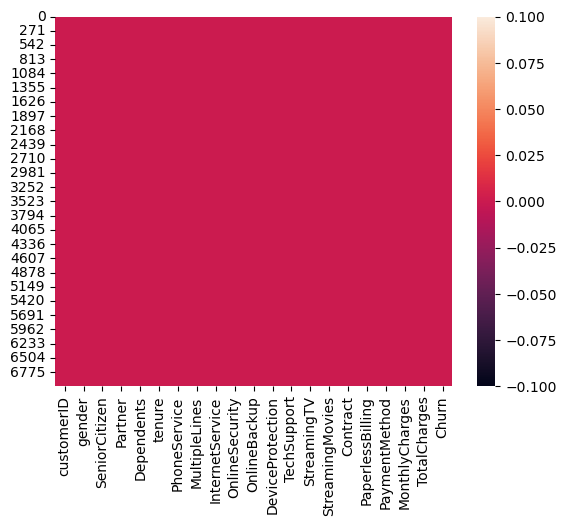

In [10]:
sns.heatmap(df.isnull())

there is no missing data in dataset

In [12]:
for i in df.columns:
    print(df[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

these are the value counts of all columns and we see white spaces in total charges column. 

In [16]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Total Charges column has continuous data but it showng as object data and 11 recordings of this column has white spaces.

In [20]:
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


by locating the white spces in totalcharges column,lets fill this column by some values

In [23]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan) 
df["TotalCharges"].value_count

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

now we can see total charges column has some whitespaces replaced by nan values. now we handle null values

In [27]:
df["TotalCharges"]=df["TotalCharges"].astype(float) 
df["TotalCharges"].dtype

dtype('float64')

we have converted data type of totalcharges column from object to float 

In [25]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

as we filled totalcharges column white spaces with null values, it showing 11 null values. replacing null values with mean method as data has continuous values.

In [28]:
np.mean(df["TotalCharges"])

2283.3004408418656

In [29]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean()) 

<Axes: >

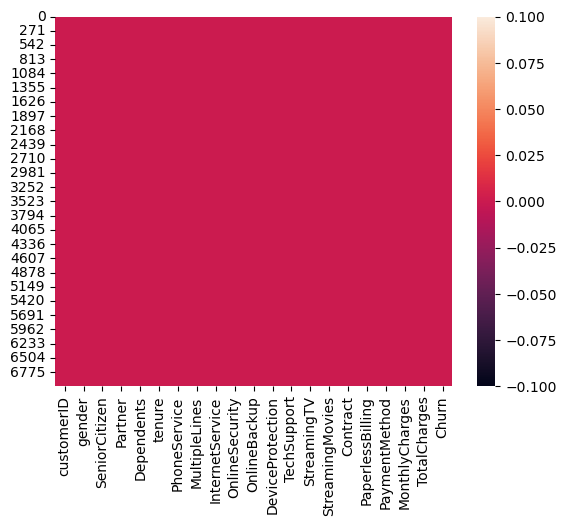

In [31]:
sns.heatmap(df.isnull())

null values are not present

In [36]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [45]:
categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_columns.append(i)
    
    
    

In [46]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_columns.append(i)
    
    
    

In [52]:
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [53]:
df.drop("customerID",axis=1,inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [54]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

we assume No standsfor not churned and Yes stands for churned

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


this gives statestical information of numerical columns.it shows there is no negative and invalid values present.
we observe 
1 the counts of all columns are same,no missing values
2 mean value is greater than median in tenure,total charges,which means data skewed right
3 in monthly charges column mean value is lesser than median ,which meand data skewed left
4 there is alot of difference between 75 percentile value and max value  it means outliers are present

No     5174
Yes    1869
Name: Churn, dtype: int64


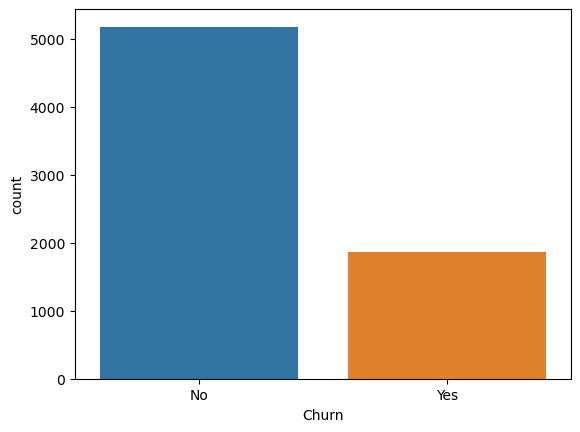

In [58]:
sns.countplot(x='Churn',data = df) 
print(df["Churn"].value_counts())

it shows more number of customers are not churned than churned.it shows class imbalance between two classes 
over sampling method is applying to balance the classes

No     4933
Yes    2110
Name: Dependents, dtype: int64


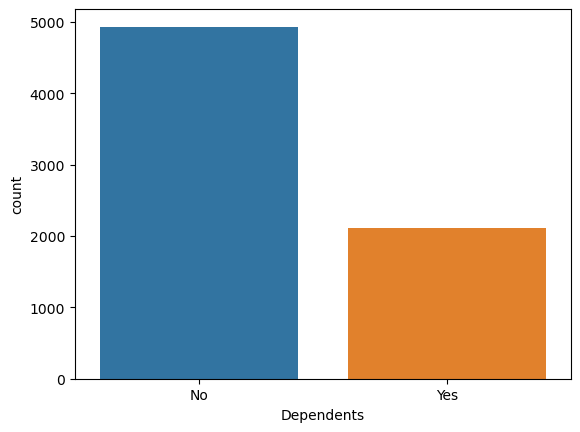

In [67]:
sns.countplot(x='Dependents',data = df) 
print(df["Dependents"].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


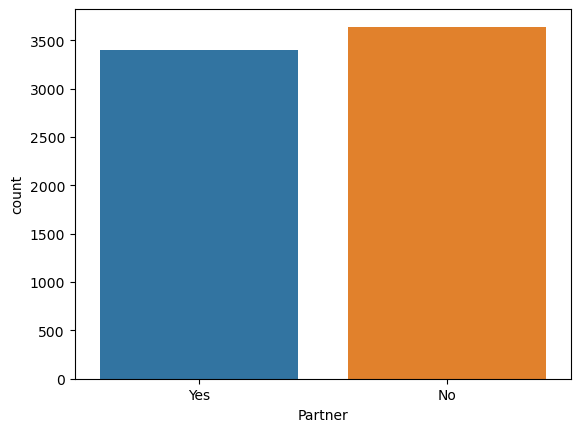

In [65]:
sns.countplot(x='Partner',data = df) 
print(df["Partner"].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


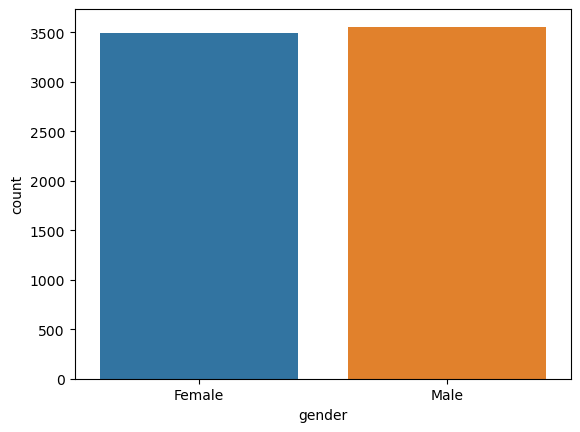

In [62]:
sns.countplot(x='gender',data = df) 
print(df["gender"].value_counts())

total number of male and female are almost same

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


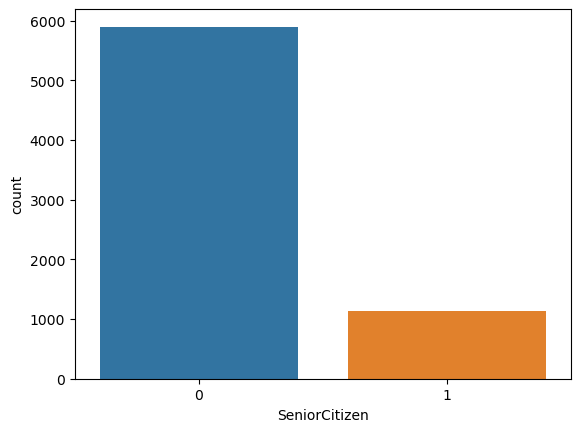

In [63]:
sns.countplot(x='SeniorCitizen',data = df) 
print(df["SeniorCitizen"].value_counts())

here 0 represents non senior citizen 1 shows seniorcitizen. here we see large difference between two classes 

Yes    6361
No      682
Name: PhoneService, dtype: int64


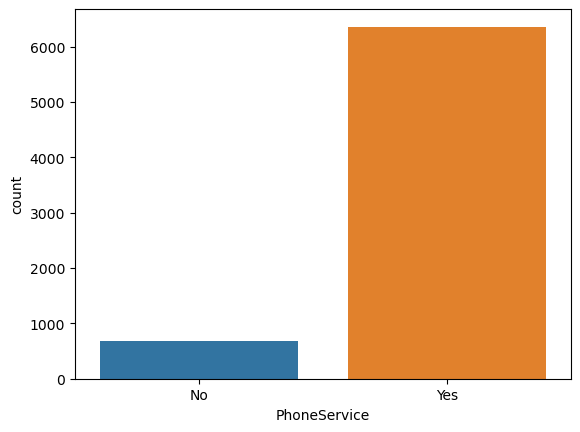

In [68]:
sns.countplot(x='PhoneService',data = df) 
print(df["PhoneService"].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


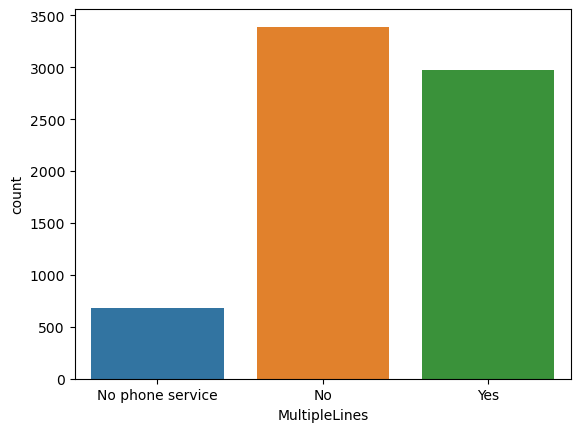

In [69]:
sns.countplot(x='MultipleLines',data = df) 
print(df["MultipleLines"].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


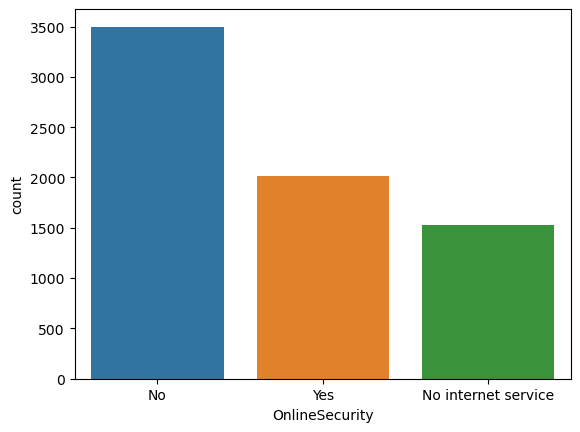

In [70]:
sns.countplot(x='OnlineSecurity',data = df) 
print(df["OnlineSecurity"].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


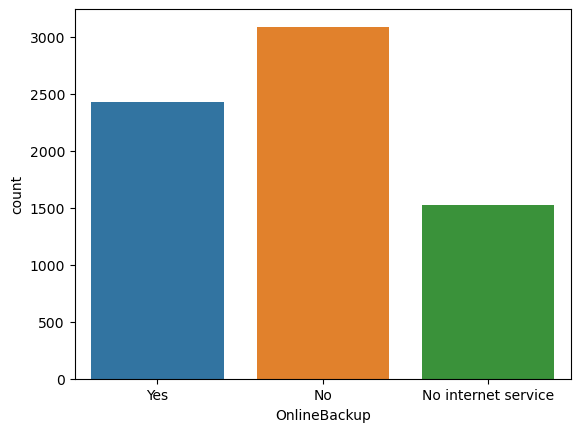

In [72]:
sns.countplot(x='OnlineBackup',data = df) 
print(df["OnlineBackup"].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


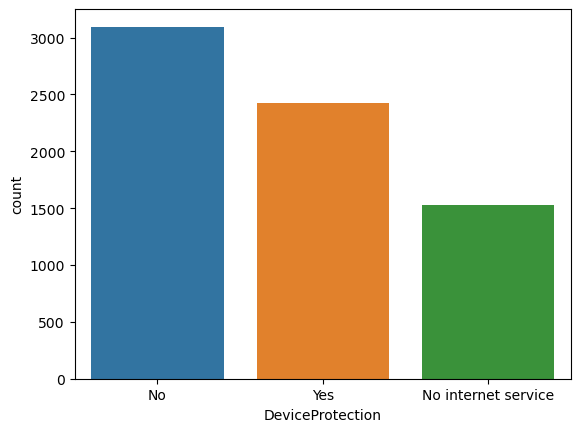

In [73]:
sns.countplot(x='DeviceProtection',data = df) 
print(df["DeviceProtection"].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


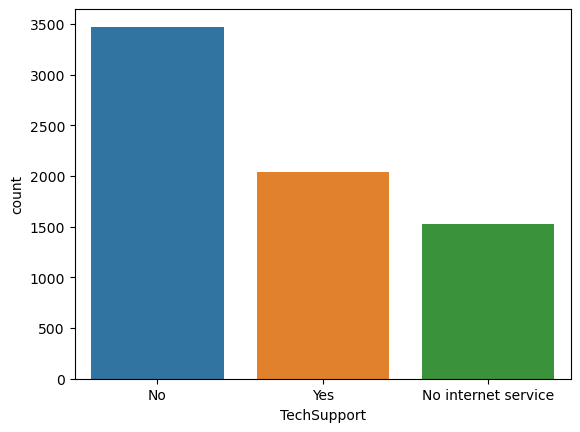

In [74]:
sns.countplot(x='TechSupport',data = df) 
print(df["TechSupport"].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


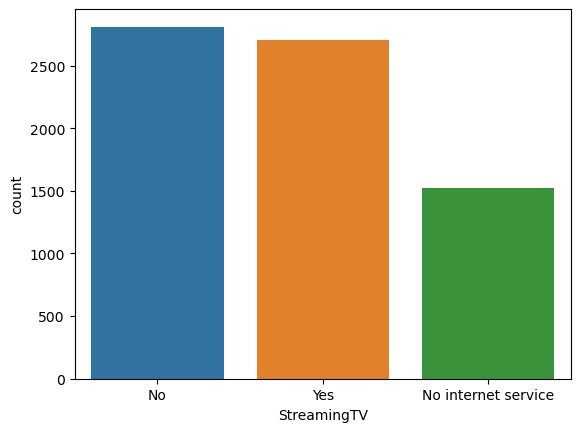

In [76]:
sns.countplot(x='StreamingTV',data = df) 
print(df["StreamingTV"].value_counts())

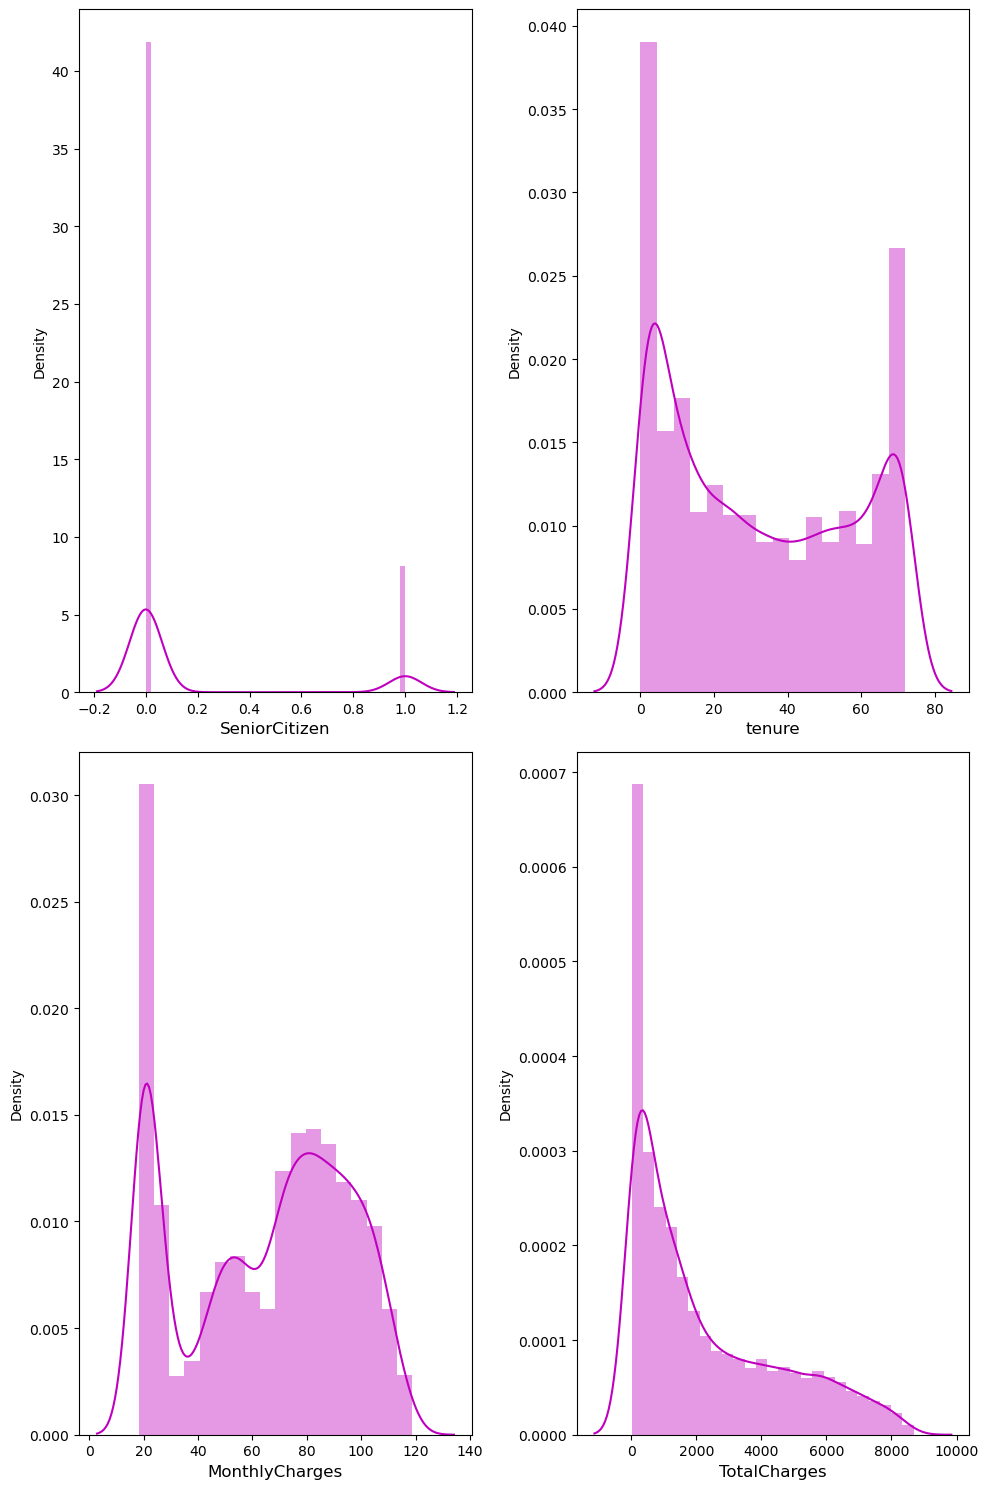

In [84]:
plt.figure(figsize = (10,15),facecolor = "white")
plotnumber = 1
for col in numerical_columns:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color = "m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()    
        

from above distribution plot we can notice that the data almost look normal in all coumns except monthly charges and data in the totalcharges column,senior citizen is skewed  to right. other like tenure  do not have skewness.

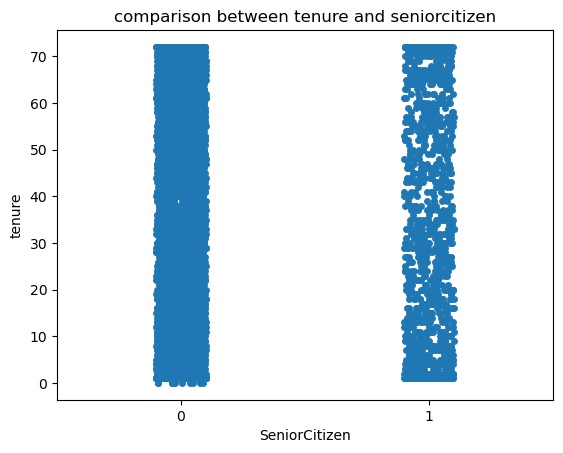

In [87]:
plt.title("comparison between tenure and seniorcitizen")
sns.stripplot(x = "SeniorCitizen",y = "tenure",data = df )
plt.show()

there is no significant between features,here both are in equal length

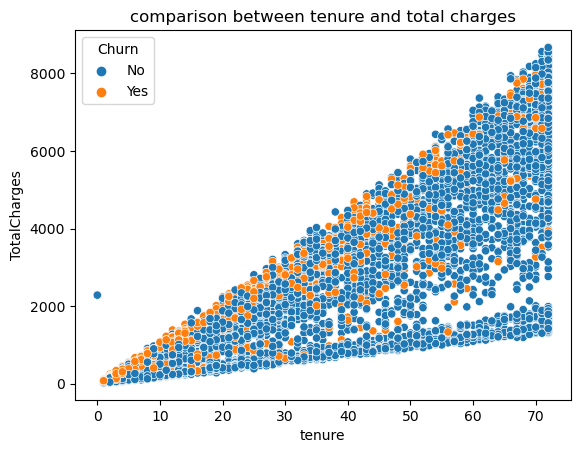

In [91]:
plt.title("comparison between tenure and total charges")
sns.scatterplot(x = "tenure",y = "TotalCharges",data = df, hue = "Churn" )
plt.show()

here we see strong relation between features
as the tenure increases total charges also increases. if the customers have low tenure services than there is high chances of churn.

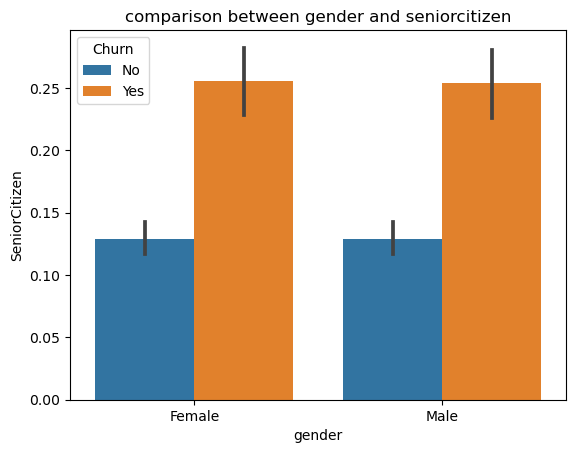

In [94]:
plt.title("comparison between gender and seniorcitizen")
sns.barplot(x = "gender",y = "SeniorCitizen",data = df,hue = "Churn" )
plt.show()

there is no significant difference between columns the customers churns remain unaffected in both.

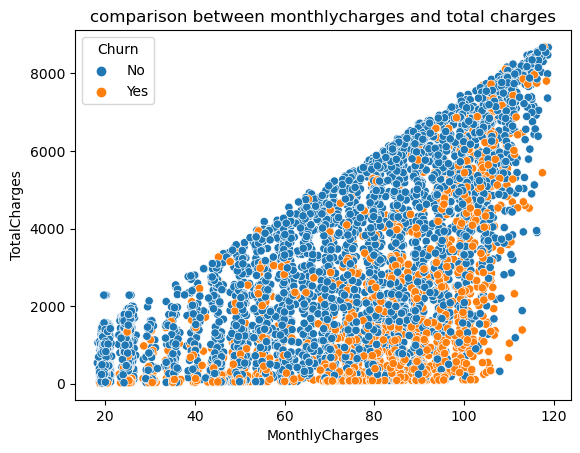

In [97]:
plt.title("comparison between monthlycharges and total charges")
sns.scatterplot(x = "MonthlyCharges",y = "TotalCharges",data = df, hue = "Churn" )
plt.show()

there is a linear relation between two columns.customer with high monthly charges have high tendency to stop services

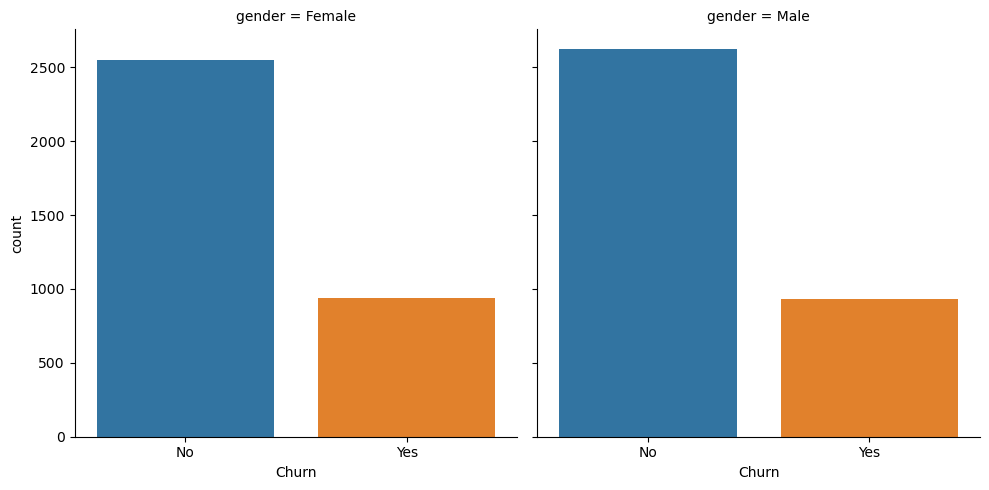

In [103]:

sns.catplot(x = "Churn",col= "gender",data = df, kind = "count" )
plt.show()

here we see there is no significant difference in genders. both genders have equal churn level

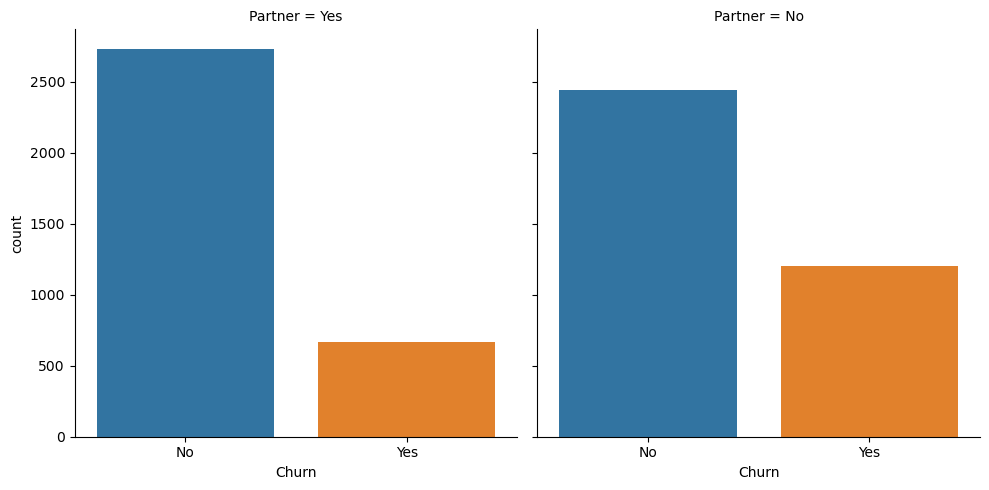

In [105]:

sns.catplot(x = "Churn",col= "Partner",data = df, kind = "count" )
plt.show()

customers without partner have high churn rate than with partner

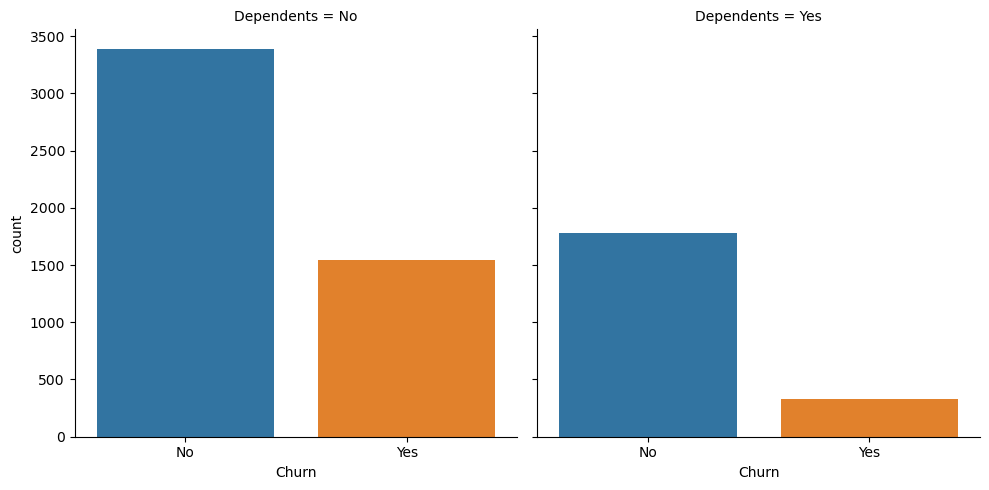

In [106]:

sns.catplot(x = "Churn",col= "Dependents",data = df, kind = "count" )
plt.show()

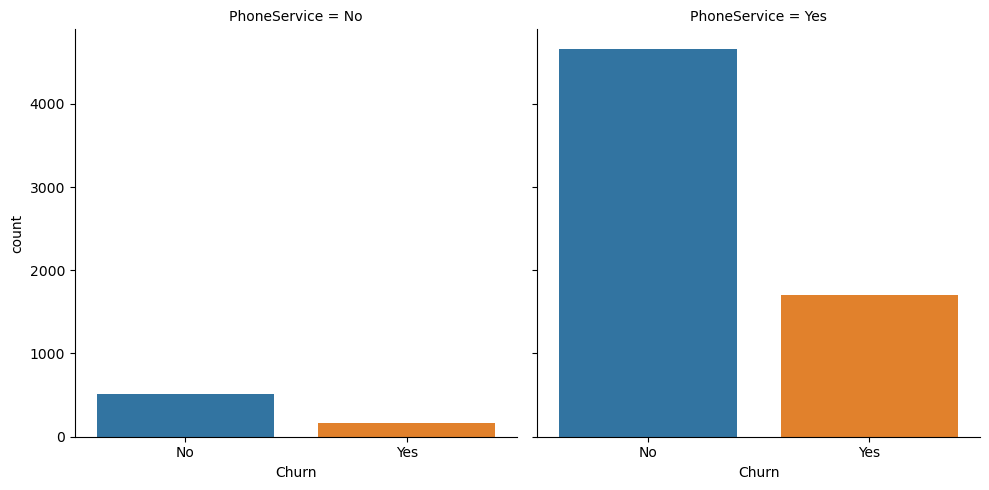

In [107]:

sns.catplot(x = "Churn",col= "PhoneService",data = df, kind = "count" )
plt.show()

customers who have phone service have tendebcy of high churned

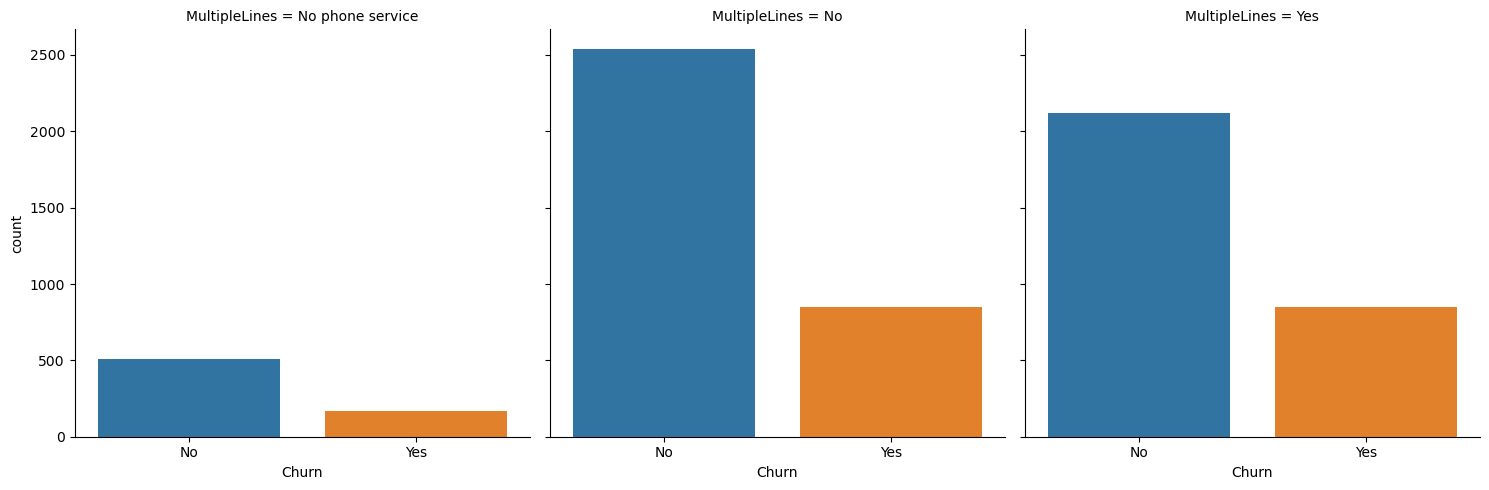

In [108]:

sns.catplot(x = "Churn",col= "MultipleLines",data = df, kind = "count" )
plt.show()

customers who do not have multiple services have high churn rate

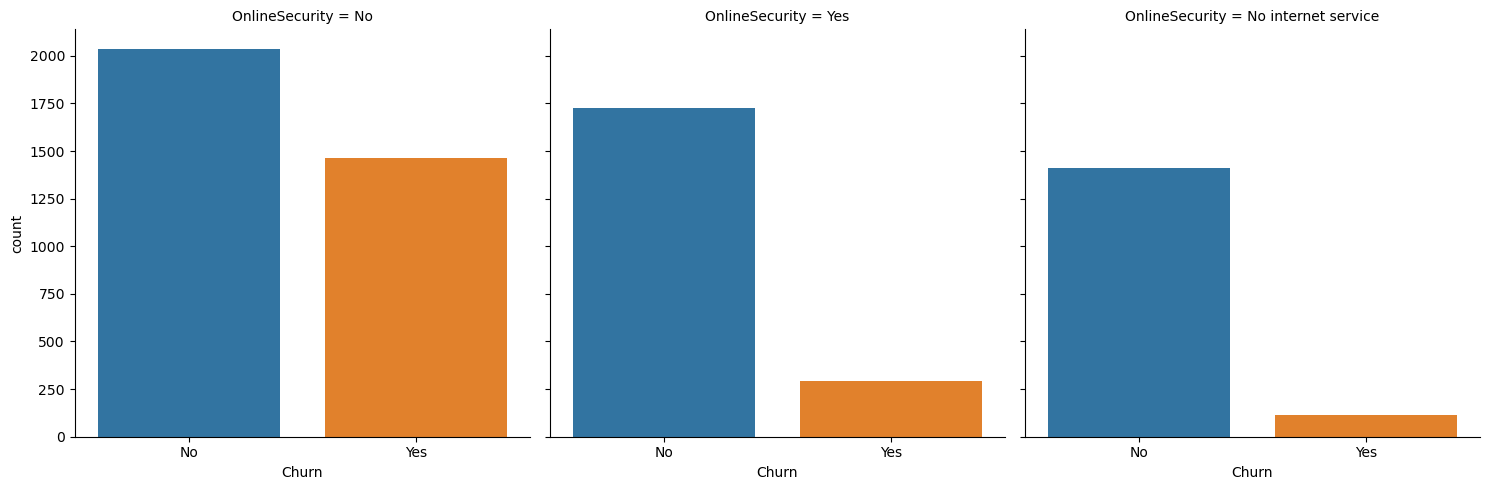

In [109]:

sns.catplot(x = "Churn",col= "OnlineSecurity",data = df, kind = "count" )
plt.show()

customers who do not have online security have high tendency of churned

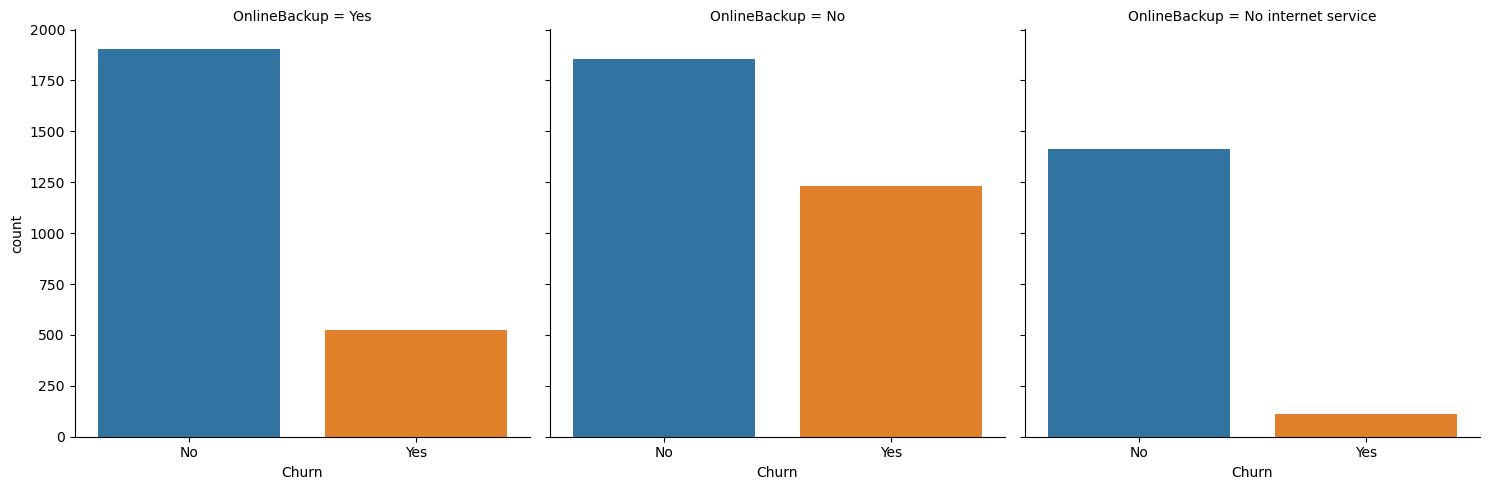

In [110]:

sns.catplot(x = "Churn",col= "OnlineBackup",data = df, kind = "count" )
plt.show()

same as online security,the customers who do not have online backup services snsthey have high churn rte

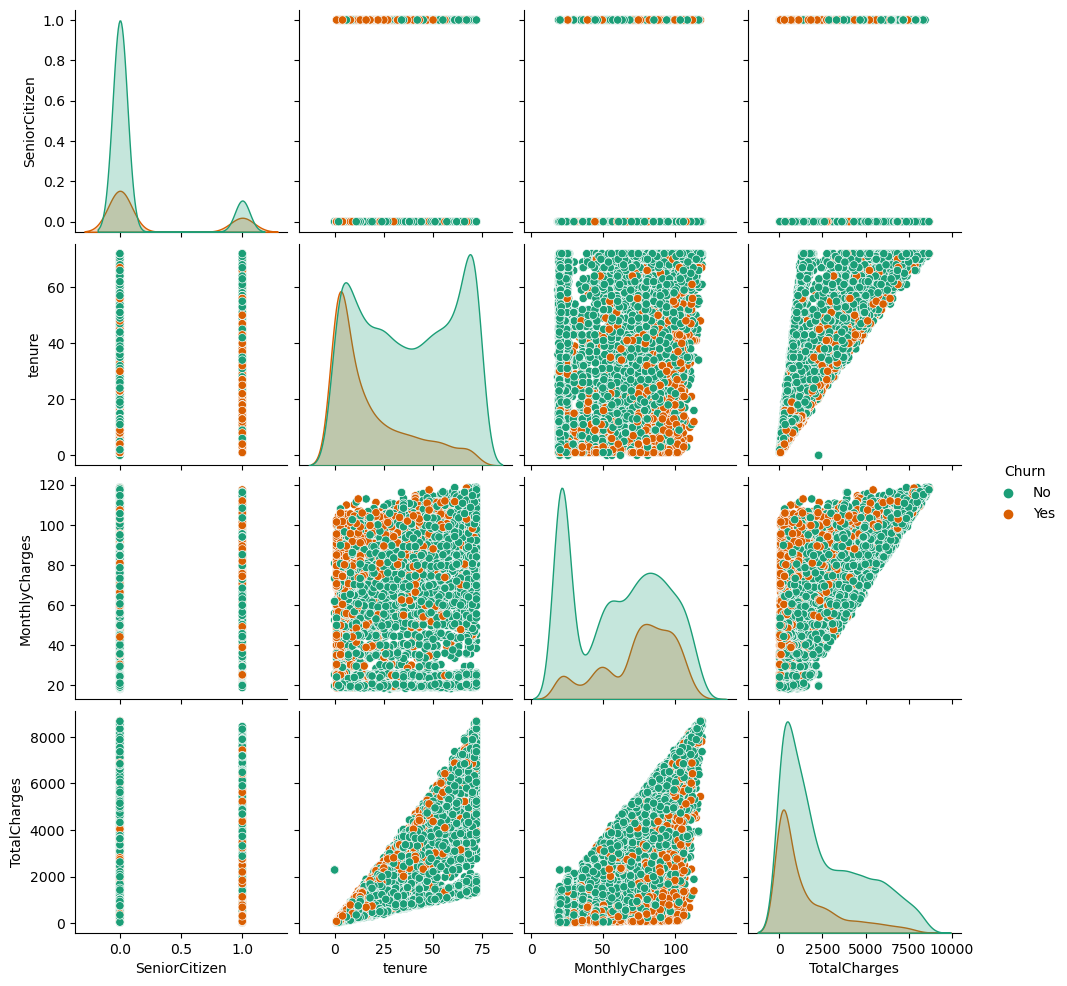

In [115]:
sns.pairplot(df,hue = "Churn",palette = "Dark2")
plt.show()

pair plot gives pair wise relation between features on the basis of target churn.
tenure,total charges and monthly charges,total charges have strong linear relation


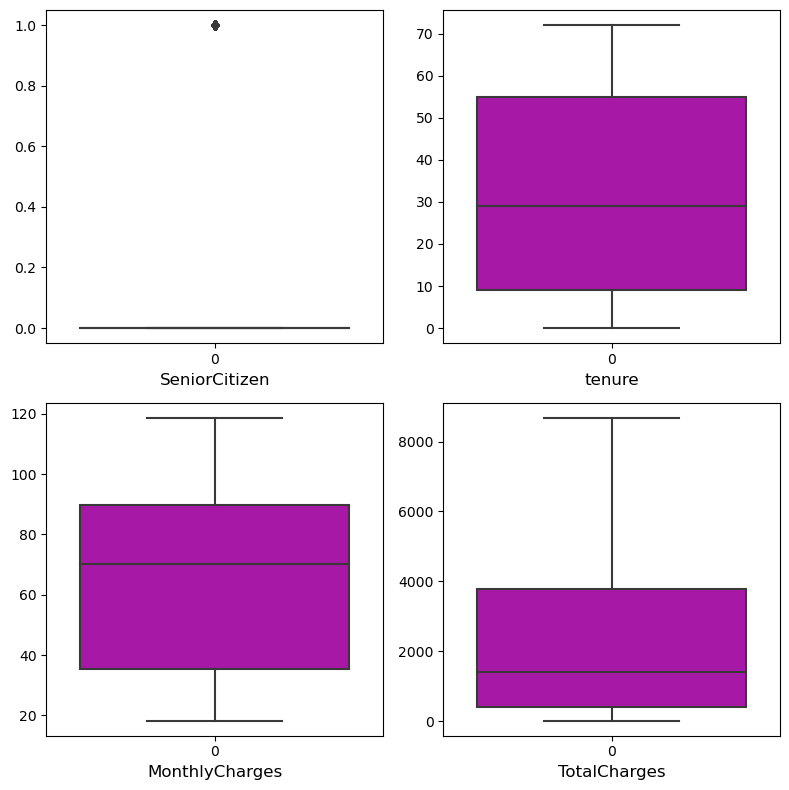

In [117]:
plt.figure(figsize = (8,8),facecolor = "white")
plotnumber = 1
for col in numerical_columns:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],color = "m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()    
        

seniorcitizen column has outliers,but it has categorical data so no need to remove outliers from this column.

In [118]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

the column senior citizen and total charges have skewness in data.no need to remove skewness in seniorcitizen because it has categorical data.total charges column has continuous data  so we have to reduse skewness

In [119]:
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [120]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

by applying cuberoot method we redused skewness in total charges column

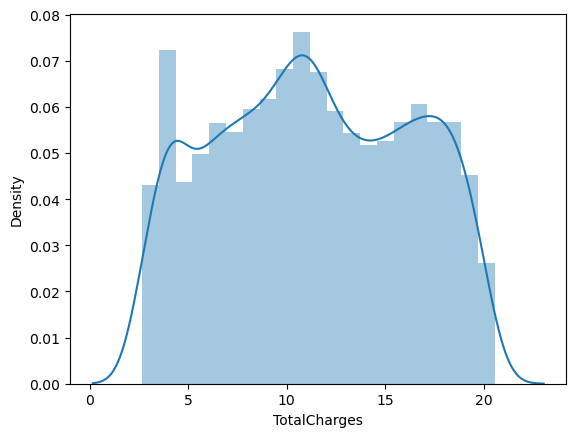

In [121]:
sns.distplot(df["TotalCharges"])
plt.show()

it shows almost skewness is removed

In [123]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df        

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [124]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


In [125]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


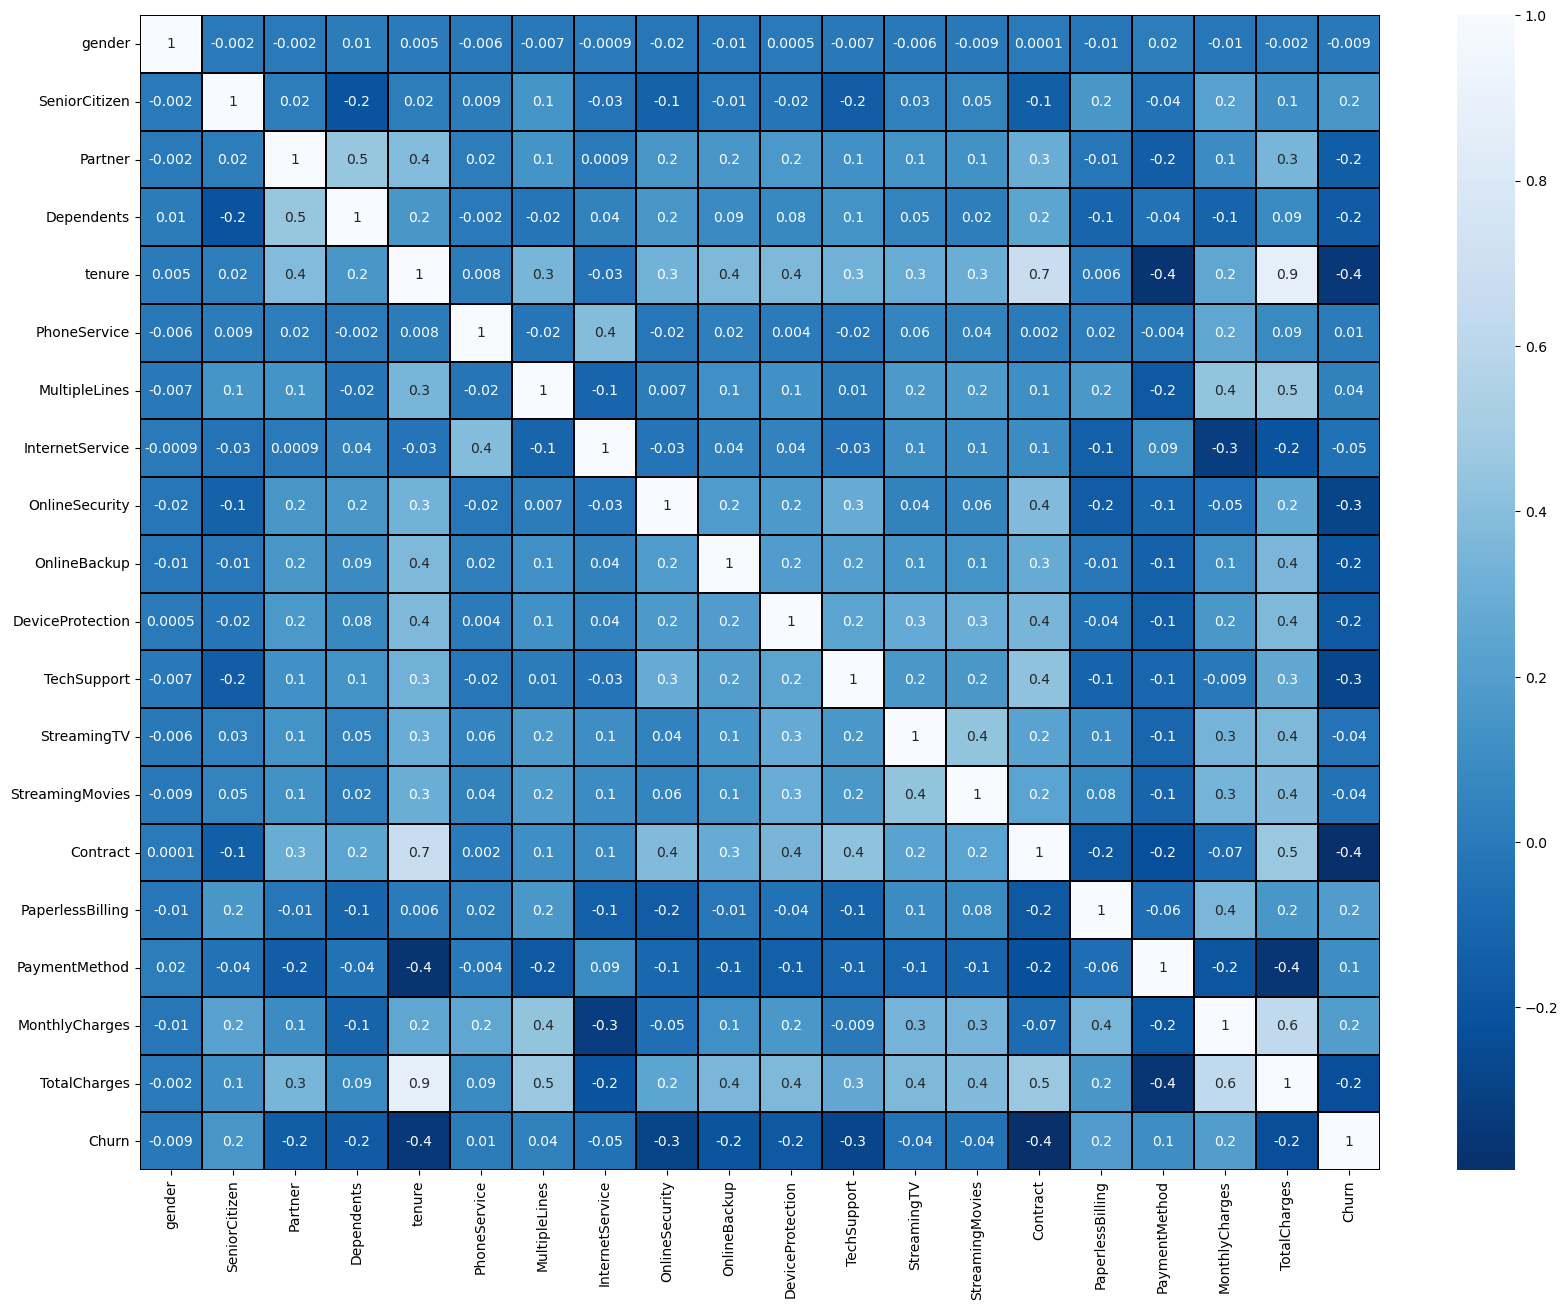

In [138]:
plt.figure(figsize = (20 ,15))
sns.heatmap(df.corr(),linewidths = 0.1, fmt = ".1g", linecolor = "black",annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0)
plt.show()

heatmap contains both positive and negative correlation
1 there is no much positive relation between trget and features
2 the lable is negatively correlated with contract,tenure,onlinesecurity,tech support,total charges, device protection,online backup ,partner and dependents
3 monthly charges, paperless billing,senior citizen,payment method have high positive correlation with lable column churn
4 the columns total charges,tenure,contract and tenure,total chrges,monthly charges and many other are have high correelation with each other

In [139]:
cor['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

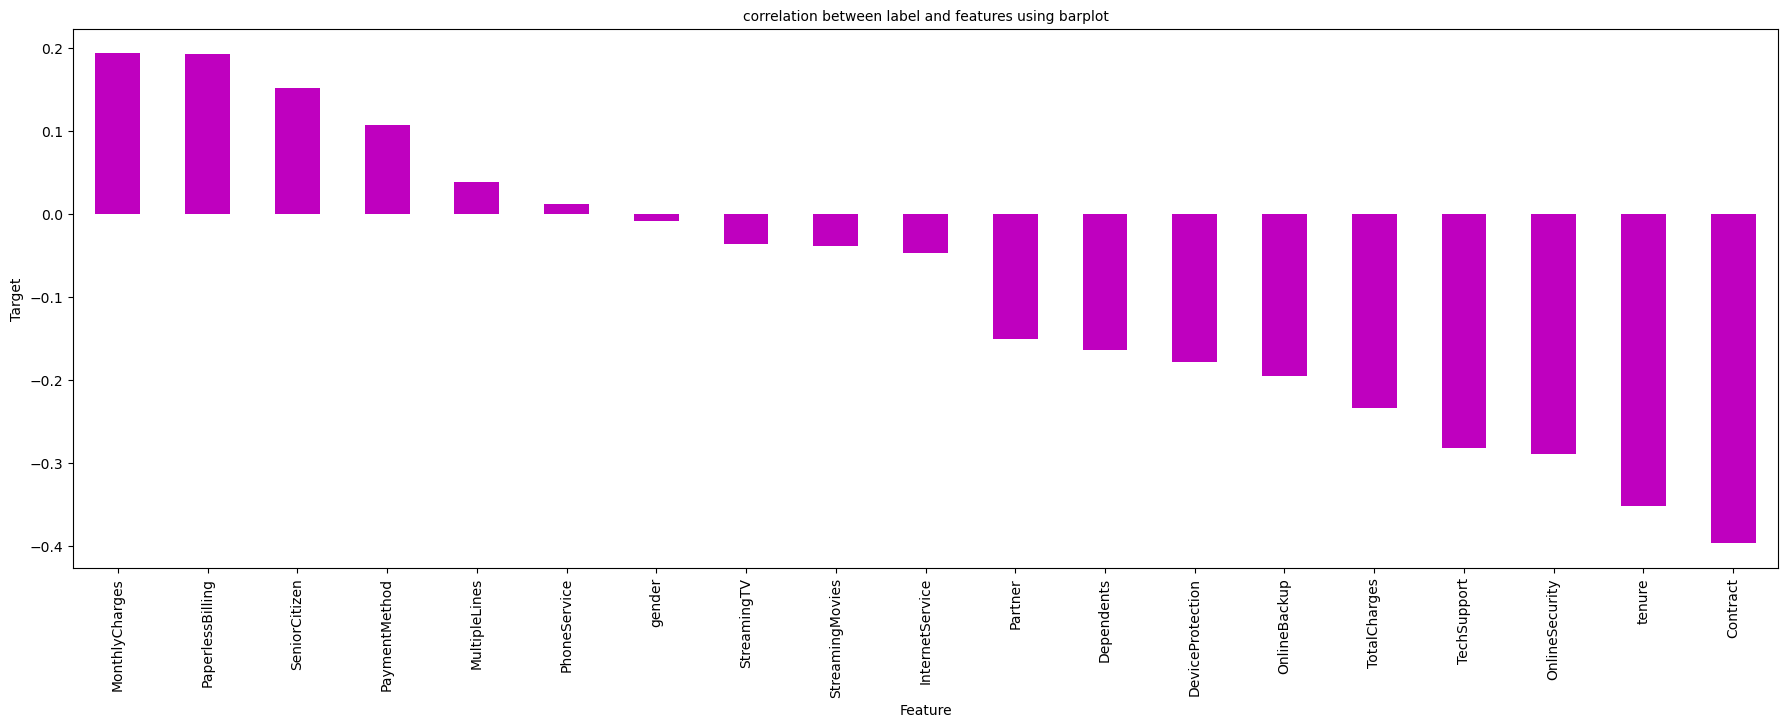

In [143]:
plt.figure(figsize=(22,7),facecolor="white")
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel("Feature",fontsize=10)
plt.ylabel("Target",fontsize=10)
plt.title("correlation between label and features using barplot",fontsize=10)
plt.show()

from above we notice both positive and negative correlation between feature and target. here the features gender and phone services have very less correlation with column

In [144]:
x = df.drop("Churn",axis = 1)
y = df["Churn"]

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


we have scaled data using standard scaler method to overcome issue of biasness

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF VALUES"]=[variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["FEATURES"]=x.columns
vif

,VIF VALUES,FEATURES
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


by checking vif vlues we can find the features causing multi colinearity problem. here we can find tenure and total charges column have vif value greater than10 which means they have high correlation with other features. we drop one column first and if same value exist then we remove column with high vif.

In [148]:
x.drop("TotalCharges",axis=1,inplace=True)

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF VALUES"]=[variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["FEATURES"]=x.columns
vif

,VIF VALUES,FEATURES
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


we solved multicolinearity

In [150]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [156]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [152]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

now data is balanced.we build machine learning classification models

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [157]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        print("BEST ACCURACY is",maxAcc,"at random_state",maxRS)

BEST ACCURACY is 0.8476650563607085 at random_state 1
BEST ACCURACY is 0.856682769726248 at random_state 2
BEST ACCURACY is 0.8576489533011272 at random_state 40
BEST ACCURACY is 0.8586151368760064 at random_state 59
BEST ACCURACY is 0.8599033816425121 at random_state 71
BEST ACCURACY is 0.8602254428341385 at random_state 94
BEST ACCURACY is 0.8660225442834139 at random_state 102


best accuracy is 86  at random state 102

In [158]:
 x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=102)

In [159]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [160]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8640901771336554
[[1354  216]
 [ 206 1329]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1570
         1.0       0.86      0.87      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



accuracy of this model is 86.4%

In [161]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7861513687600644
[[1186  384]
 [ 280 1255]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      1570
         1.0       0.77      0.82      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



accuracy of this model is 78.6%

In [162]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8151368760064412
[[1225  345]
 [ 229 1306]]
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1570
         1.0       0.79      0.85      0.82      1535

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.81      3105



accuracy of this model is 81.5%

In [163]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8524959742351047
[[1309  261]
 [ 197 1338]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1570
         1.0       0.84      0.87      0.85      1535

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



accuracy of this model is 85%

In [164]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC= ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8235104669887279
[[1243  327]
 [ 221 1314]]
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      1570
         1.0       0.80      0.86      0.83      1535

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



accuracy of this model is 82%

In [165]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8405797101449275
[[1353  217]
 [ 278 1257]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      1570
         1.0       0.85      0.82      0.84      1535

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



accuracy of this model is 84%

In [166]:
EC=ExtraTreesClassifier()
EC.fit(x_train,y_train)
predEC= EC.predict(x_test)
print(accuracy_score(y_test,predEC))
print(confusion_matrix(y_test,predEC))
print(classification_report(y_test,predEC))

0.8647342995169082
[[1342  228]
 [ 192 1343]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1570
         1.0       0.85      0.87      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



accuracy of this model is 86%

In [167]:
from sklearn.model_selection import cross_val_score

In [168]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("difference between accuracy and cross validation score is_",accuracy_score(y_test,predRFC)-score.mean())

[0.77294686 0.78599034 0.89323671 0.90285162 0.90671822]
0.8523487507092273
difference between accuracy and cross validation score is_ 0.011741426424428103


In [169]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("difference between accuracy and cross validation score is_",accuracy_score(y_test,predRFC)-score.mean())

[0.77149758 0.75217391 0.78502415 0.79217013 0.78830353]
0.7778338621892533
difference between accuracy and cross validation score is_ 0.08625631494440211


In [170]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("difference between accuracy and cross validation score is_",accuracy_score(y_test,predsvc)-score.mean())

[0.7763285  0.76570048 0.81980676 0.83035283 0.83131948]
0.8047016108507691
difference between accuracy and cross validation score is_ 0.010435265155672169


In [171]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("difference between accuracy and cross validation score is_",accuracy_score(y_test,predGB)-score.mean())

[0.75169082 0.77874396 0.86811594 0.88061866 0.88400193]
0.8326342628589041
difference between accuracy and cross validation score is_ 0.01986171137620063


In [172]:
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("difference between accuracy and cross validation score is_",accuracy_score(y_test,predABC)-score.mean())

[0.76376812 0.77439614 0.83140097 0.85210246 0.84146931]
0.8126273982390149
difference between accuracy and cross validation score is_ 0.01088306874971301


In [173]:
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("difference between accuracy and cross validation score is_",accuracy_score(y_test,predBC)-score.mean())

[0.73381643 0.75652174 0.87294686 0.88738521 0.88738521]
0.8276110889295161
difference between accuracy and cross validation score is_ 0.012968621215411424


In [175]:
score=cross_val_score(EC,x,y)
print(score)
print(score.mean())
print("difference between accuracy and cross validation score is_",accuracy_score(y_test,predEC)-score.mean())

[0.80724638 0.79951691 0.9        0.90526825 0.90671822]
0.8637499503832746
difference between accuracy and cross validation score is_ 0.0009843491336335441


extra tree classifier is the best model as the difference between accuracy and cross validation score is less

HYPER PARAMETER TUNING

In [182]:
from sklearn.model_selection import GridSearchCV
parameters ={'criterion':['gini','entropy'],
             'random_state':[10,50,1000],
            'n_jobs':[0,10,20],
             'max_depth':[-2,-1,1] ,
            'n_estimators':[50,100,200,300]}

In [183]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters, cv = 5)

In [184]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [-2, -1, 1],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [0, 10, 20],
                         'random_state': [10, 50, 1000]})

In [185]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'n_estimators': 50,
 'n_jobs': 10,
 'random_state': 1000}

In [187]:
Final_model=ExtraTreesClassifier(criterion = 'gini',random_state = 1000,n_jobs= 10,max_depth= 1 ,n_estimators= 50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


76.26409017713365


In [188]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve

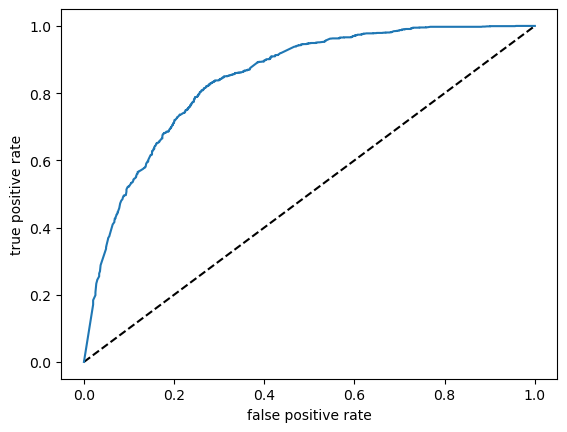

auc_score: /n 0.7636672960019919


In [189]:
y_pred_prob =Final_model.predict_proba(x_test)[:,1]
fpr,tpr,threshholds = roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier(area=%0.2f)'%roc_auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('auc_score:','/n',auc_score)

In [190]:
import joblib
joblib.dump(Final_model,"TELECOM_CUSTOMER_ANALYSIS.pkl")

['TELECOM_CUSTOMER_ANALYSIS.pkl']